In [1]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import os
from PIL import Image
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 16, 16

In [2]:
reader = easyocr.Reader(['en','th'])

ไล่ชื่อของรูปภาพสำหรับเอาใส่ชื่อไฟล์ Output

In [14]:
path = './OCR_Test_Pic'
# Store the image file names in a list as long as they are jpgs
images = [f for f in os.listdir(path) if (os.path.splitext(f)[-1] == '.jpg' or os.path.splitext(f)[-1] == '.PNG' or os.path.splitext(f)[-1] == '.png')]
print(images)

Image(images[0])

for image in images:
    print(image)
    Image(str(image))
    break
   # Do whatever you need to do with the image

['Meeting_1.PNG', 'OCR_AntiFake1.PNG', 'OCR_AntiFake2.jpg', 'OCR_AntiFake2.PNG', 'OCR_AntiFake3.jpg', 'OCR_AntiFake4.jpg', 'OCR_AntiFake5.jpg', 'OCR_Example.PNG', 'OCR_Sure2.jpg', 'OCR_Test1.PNG', 'OCR_Test2.PNG', 'OCR_ThaiTest1.png', 'OCR_ThaiTest2.png', 'OCR_ThaiTest3.PNG', 'OCR_ThaiTest4.PNG', 'OCR_ThaiTest5.PNG', 'OCR_ThaiTest6.PNG', 'OCR_ThaiTestCrop4.png', 'OCR_TheMATTER.jpg', 'OCR_TheStandard1.jpg', 'OCR_ชัวร์1.PNG', 'OCR_ชัวร์3.jpg', 'OCR_ชัวร์3_easyOCR.jpg', 'OCR_ชัวร์4.jpg', 'OCR_ชัวร์5.PNG', 'OCR_ชัวร์6.jpg', 'OCR_ฟ้าทะลายโจร.jpg', 'OCR_สำนัก1.jpg', 'OCR_สำนัก2.jpg', 'OCR_ไทยรู้.jpg']
Meeting_1.PNG


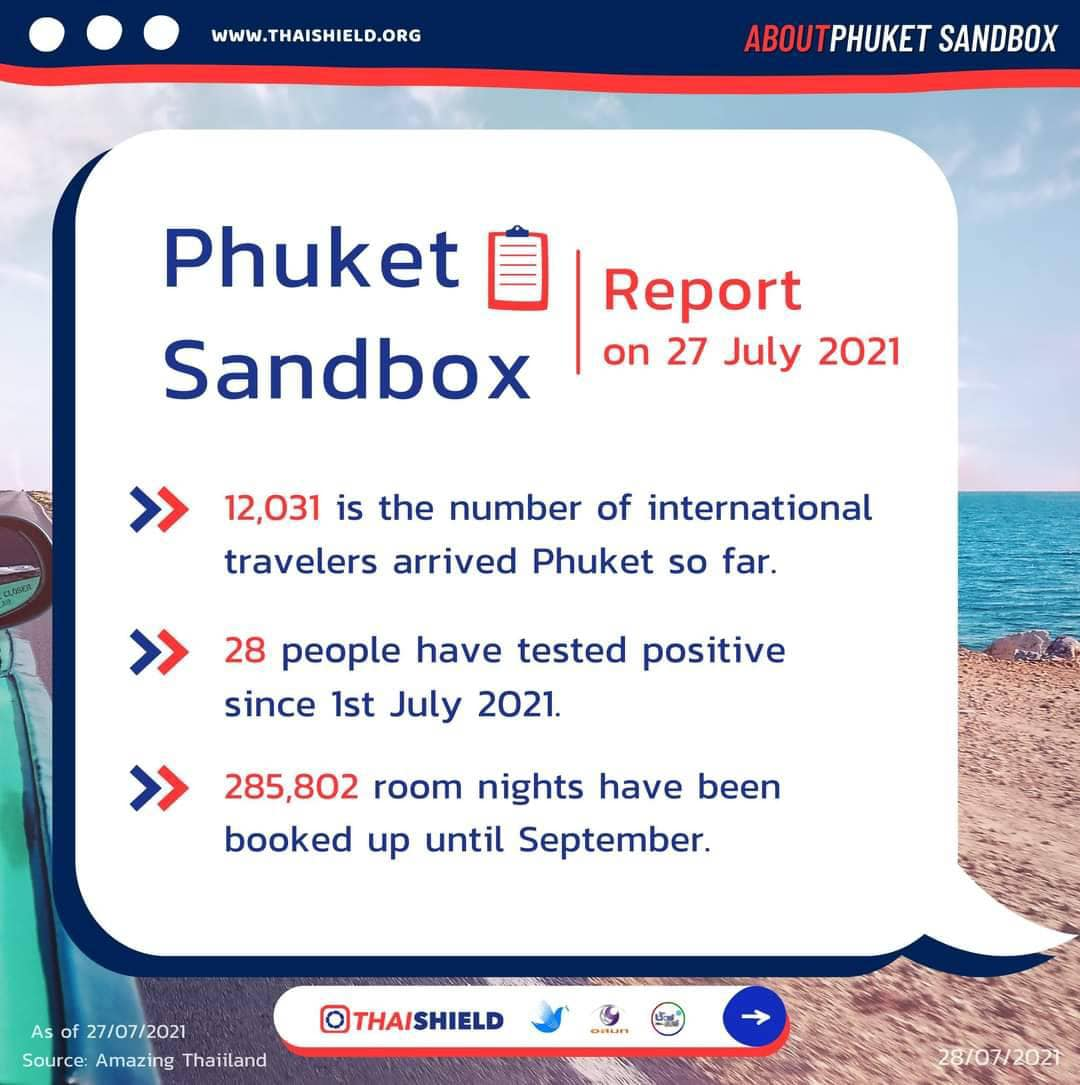

In [6]:
Image('./OCR_Test_Pic/OCR_Sure2.jpg')

In [7]:
output = reader.readtext('./OCR_Test_Pic/OCR_Sure2.jpg')

In [8]:
output

[([[207, 25], [425, 25], [425, 45], [207, 45]],
  'พพพ thaishleld.org',
  0.22365233062707635),
 ([[737, 17], [1065, 17], [1065, 59], [737, 59]],
  ' aboutphuket sandbox',
  0.8206684533717404),
 ([[158, 213], [473, 213], [473, 302], [158, 302]],
  'phuket',
  0.9534567936159846),
 ([[597, 259], [814, 259], [814, 333], [597, 333]],
  'report',
  0.9999921159408511),
 ([[154, 325], [541, 325], [541, 411], [154, 411]],
  'sandbox',
  0.7014112847530714),
 ([[598, 330], [908, 330], [908, 378], [598, 378]],
  'on 27 july 2021',
  0.5701469125923248),
 ([[219, 489], [879, 489], [879, 529], [219, 529]],
  '12,031 is the number of international',
  0.7173946748995882),
 ([[219, 543], [779, 543], [779, 581], [219, 581]],
  ' travelers arrived phuket so far.',
  0.5404152734459298),
 ([[217, 623], [794, 623], [794, 685], [217, 685]],
  '28 people have tested positive',
  0.7600552126877563),
 ([[219, 685], [563, 685], [563, 729], [219, 729]],
  'since ist july 2021.',
  0.7002751713856816),
 ([

In [9]:
len(output)

16

In [12]:
messege_list = []
for messege in range(0,len(output)):
        print(output[messege][1])

        messege_list.append(output[messege][1])

print(messege_list)

พพพ thaishleld.org
 aboutphuket sandbox
phuket
report
sandbox
on 27 july 2021
12,031 is the number of international
 travelers arrived phuket so far.
28 people have tested positive
since ist july 2021.
285,802 room nights have been
booked up until september.
45 0f 27/07/2021
thaishield
source: amazing thaiiland
2810712021:
['พพพ thaishleld.org', ' aboutphuket sandbox', 'phuket', 'report', 'sandbox', 'on 27 july 2021', '12,031 is the number of international', ' travelers arrived phuket so far.', '28 people have tested positive', 'since ist july 2021.', '285,802 room nights have been', 'booked up until september.', '45 0f 27/07/2021', 'thaishield', 'source: amazing thaiiland', '2810712021:']


In [15]:
textfile = open(images[0]+".txt", "w")
for element in messege_list:
    textfile.write(element + "\n")
textfile.close()


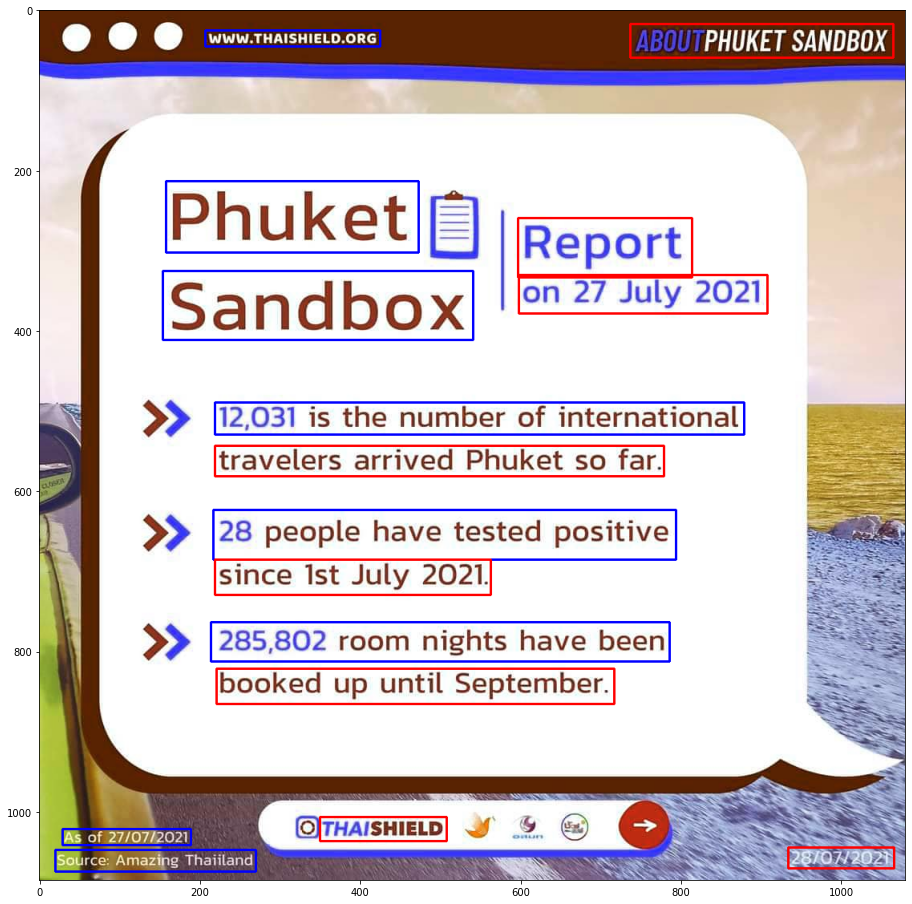

In [17]:
tmp = cv2.imread('./OCR_Test_Pic/OCR_Sure2.jpg')

cv2.imwrite('tmp.png', tmp)
for sentence_number in range(len(output)):
        cord = output[sentence_number][0]
        x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
        x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
        image = cv2.imread('tmp.png')
        cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
        tmp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imwrite('tmp.png', tmp)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [38]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [39]:
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

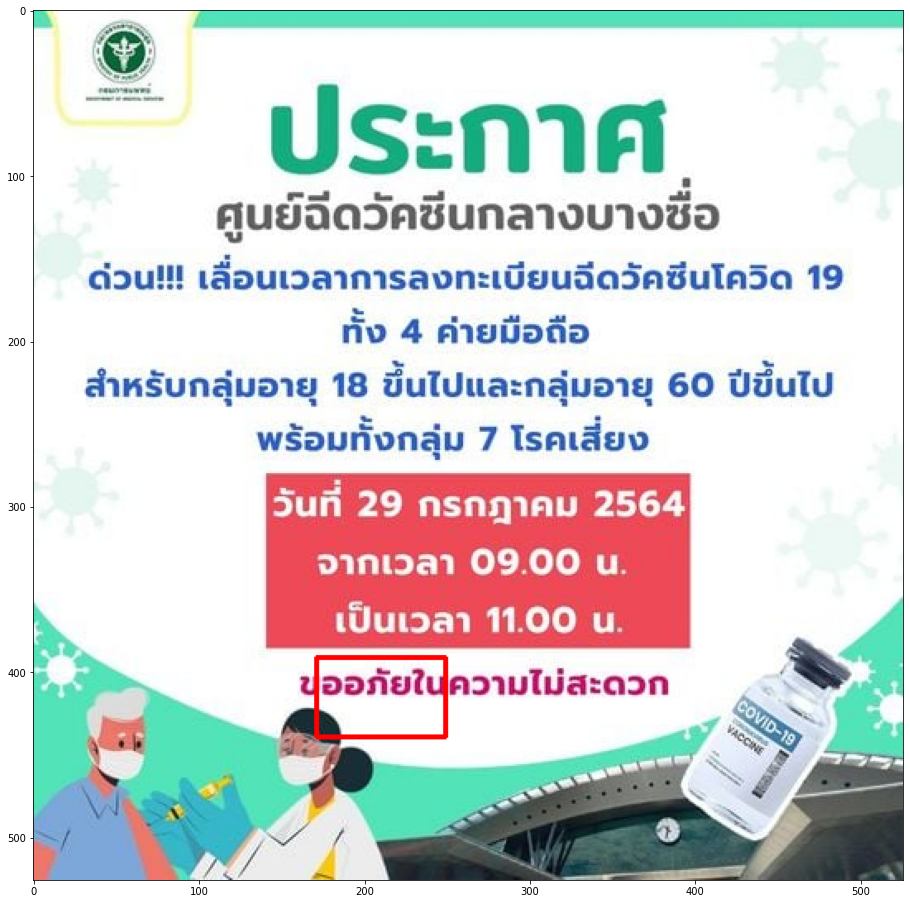

In [40]:
image = cv2.imread(images[0])
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))